In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve, GridSearchCV, validation_curve

# Load and preprocess the data

In [2]:
PATH_TO_SAMSUNG_DATA = "datasets/"
X_train = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA,
                                  "samsung_train_labels.txt")).astype(int)

X_test = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_test.txt"))
y_test = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA,
                                  "samsung_test_labels.txt")).astype(int)

X = np.vstack((X_train, X_test))
Y = np.concatenate((y_train, y_test))

sc = StandardScaler()
X = sc.fit_transform(X)
print("Shape of input data:",X.shape)
print("Shape of labels:",Y.shape)
random_seed = 1

Shape of input data: (10299, 561)
Shape of labels: (10299,)


# Kmeans

k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9


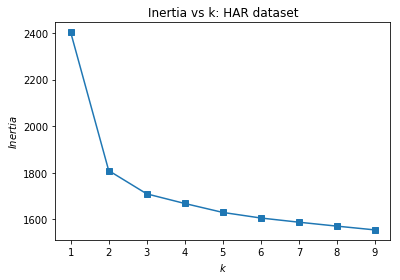

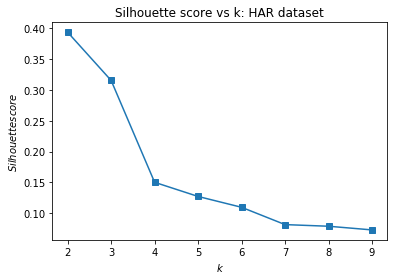

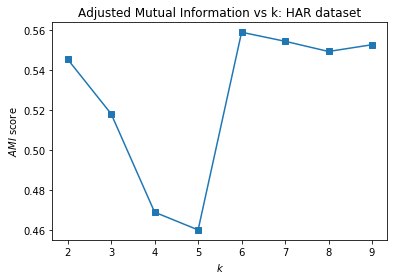

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
inertia = []
sil = []
ami = []
max_k = 10
for k in range(1, max_k):
    print("k:",k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed, n_jobs = -1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    if(k > 1):
        sil.append(silhouette_score(X, kmeans.labels_))
        ami.append(adjusted_mutual_info_score(Y, kmeans.labels_, average_method = 'arithmetic'))
plt.plot(range(1, max_k), inertia, marker='s');
plt.title('Inertia vs k: HAR dataset')
plt.xlabel('$k$')
plt.ylabel('$Inertia$');
plt.show()

plt.plot(range(2, max_k), sil, marker='s');
plt.title('Silhouette score vs k: HAR dataset')
plt.xlabel('$k$')
plt.ylabel('$Silhouette score$');
plt.show()

plt.plot(range(2, max_k), ami, marker='s');
plt.title('Adjusted Mutual Information vs k: HAR dataset')
plt.xlabel('$k$')
plt.ylabel('$AMI$ score');
plt.show()

In [4]:
# Use elbow method in Inertia vs k plot for computing best k value
k = 2

In [5]:
kmeans = KMeans(n_clusters=k, random_state=random_seed, n_jobs = -1)
kmeans.fit(X)
kmeans_labels = kmeans.predict(X)

In [6]:
print('Inertia: ', kmeans.inertia_)
sil_score = silhouette_score(X, kmeans.labels_)
print('Silhouette score: ', sil_score)
ami_score = adjusted_mutual_info_score(Y, kmeans.labels_, average_method = 'arithmetic')
print('Adjusted Mutual Information (AMI) score: ', ami_score)

Inertia:  3272856.6151197483
Silhouette score:  0.39373247640770803
Adjusted Mutual Information (AMI) score:  0.545374631408935


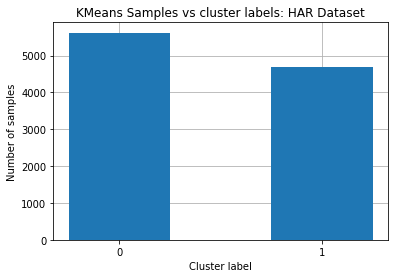

In [7]:
plt.figure()
plt.hist(kmeans.labels_, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('KMeans Samples vs cluster labels: HAR Dataset')
plt.grid()


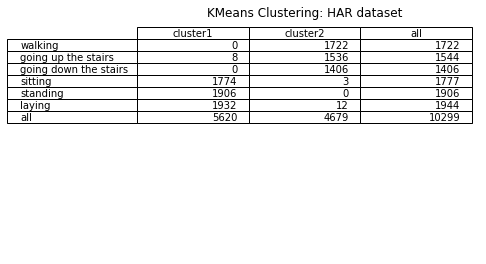

In [8]:
from pandas.plotting import table
kmeans_tab = pd.crosstab(Y, kmeans_labels, margins=True)
kmeans_tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
kmeans_tab.columns = ['cluster' + str(i + 1) for i in range(k)] + ['all']
plt.figure()
ax = plt.subplot(111,frameon=False, title = "KMeans Clustering: HAR dataset") # no visible frame
ax.axis("off")
table(ax,kmeans_tab, loc = 'upper center');

# Expectation Maximization

Components: 1
Components: 2
Components: 3
Components: 4
Components: 5
Components: 6
Components: 7
Components: 8
Components: 9


Text(0.5, 1.0, 'AIC/BIC vs GMM components: HAR Dataset')

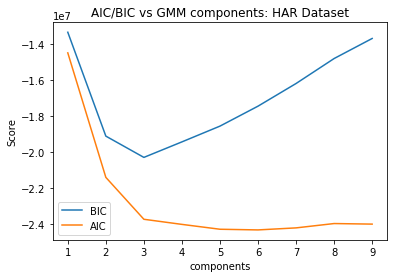

In [9]:
from sklearn.mixture import GaussianMixture as GMM

aic = []
bic = []
max_components = 10
for components in range(1, max_components):
    print("Components:",components)
    gmm = GMM(n_components=components,covariance_type='full',random_state=random_seed).fit(X)
    aic.append(gmm.aic(X))
    bic.append(gmm.bic(X))

plt.plot(np.arange(1,max_components), bic, label='BIC')
plt.plot(np.arange(1,max_components), aic, label='AIC')
plt.legend(loc='best')
plt.xlabel('components');
plt.ylabel('Score')
plt.title('AIC/BIC vs GMM components: HAR Dataset')


In [10]:
n_best = range(1,max_components)[np.argmin(bic)]
print('Optimal number of components for dataset 1 based on BIC: ', n_best)

Optimal number of components for dataset 1 based on BIC:  3


In [11]:
gmm = GMM(n_components=n_best,covariance_type='full',random_state=random_seed).fit(X)
gmm_labels = gmm.predict(X)

In [12]:
print('BIC: ', gmm.bic(X))
score_gmm = silhouette_score(X, gmm_labels)
print('Silhouette score: ', score_gmm)
ami1_gmm = adjusted_mutual_info_score(Y, gmm_labels, average_method = 'arithmetic')
print('Adjusted Mutual Information (AMI) score: ', ami1_gmm)


BIC:  -20304600.443260897
Silhouette score:  0.20301857054295472
Adjusted Mutual Information (AMI) score:  0.48984071386028455


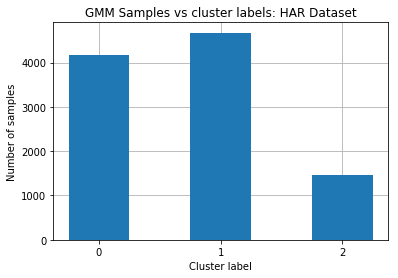

In [13]:
plt.figure()
plt.hist(gmm_labels, bins=np.arange(0, n_best + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, n_best))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('GMM Samples vs cluster labels: HAR Dataset')
plt.grid()


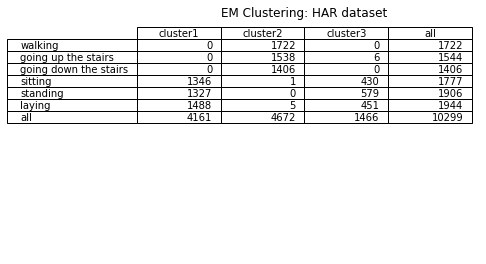

In [14]:

gmm_tab = pd.crosstab(Y, gmm_labels, margins=True)
gmm_tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
gmm_tab.columns = ['cluster' + str(i + 1) for i in range(n_best)] + ['all']
plt.figure()
ax = plt.subplot(111,frameon=False, title = "EM Clustering: HAR dataset") # no visible frame
ax.axis("off")
table(ax, gmm_tab, loc = 'upper center');

# Dimensionality reduction: PCA

In [15]:
from sklearn.decomposition import PCA
print("Total number of components:", len(X[0]))

pca = PCA(n_components=0.9,random_state = random_seed)
pca = pca.fit(X)
X_reduced_pca = pca.fit_transform(X)

variance = pca.explained_variance_ratio_
print("Number of components that explain 90% variance: ", len(variance))

print("Variance explained by first three components: ",round(variance[0]*100,2),round(variance[1]*100,2), round(variance[2]*100,2))
n_best = len(variance)

dims = range(1,200,10)
mse = []
for dim in dims:
    print(dim)
    pca_temp = PCA(n_components=dim,random_state = random_seed)
    X_temp = pca_temp.fit_transform(X)
    X_inverse = pca_temp.inverse_transform(X_temp)
    mse.append(np.sum(np.square(X - X_inverse))/X_inverse.size)

Total number of components: 561
Number of components that explain 90% variance:  65
Variance explained by first three components:  50.74 6.24 2.69
1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191


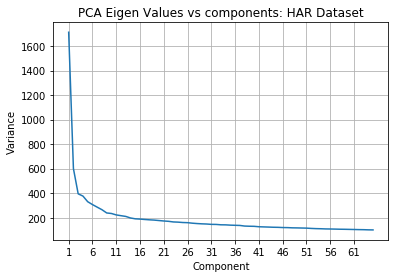

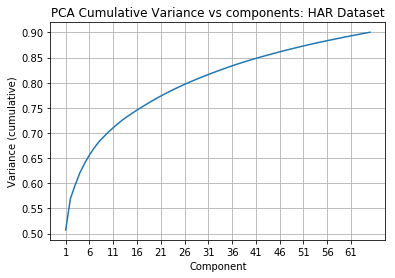

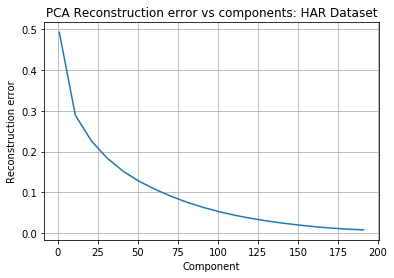

In [16]:
# Plot variance explained by each component to find the best number of components
plt.figure()
plt.plot(np.arange(1, len(pca.singular_values_) + 1), pca.singular_values_)
plt.xticks(np.arange(1, len(pca.singular_values_) + 1,5))
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('PCA Eigen Values vs components: HAR Dataset')
plt.grid()

plt.figure()
plt.plot(np.arange(1, n_best + 1), np.cumsum(variance))
plt.xticks(np.arange(1, n_best + 1,5))
plt.xlabel('Component')
plt.ylabel('Variance (cumulative)')
plt.title('PCA Cumulative Variance vs components: HAR Dataset')
plt.grid()

plt.figure()
plt.plot(dims, mse)
plt.xlabel('Component')
plt.ylabel('Reconstruction error')
plt.title('PCA Reconstruction error vs components: HAR Dataset')
plt.grid()



In [17]:
X_inverse = pca.inverse_transform(X_reduced_pca)
mse1 = np.sum(np.square(X - X_inverse))/X_inverse.size
print('PCA Reconstruction mean squared error for HAR dataset:', mse1)


PCA Reconstruction mean squared error for HAR dataset: 0.09951666531770721


Shape of projected data: (10299, 2)


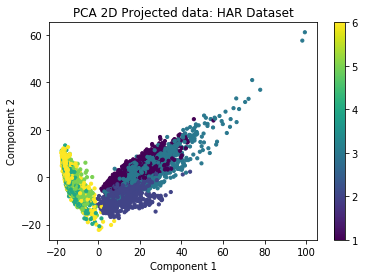

In [18]:
pca = PCA(n_components=2, random_state = random_seed)
X_2d_pca = pca.fit_transform(X)  
print("Shape of projected data:", X_2d_pca.shape)
plt.scatter(X_2d_pca[:,0], X_2d_pca[:,1],c=Y,s=10);
plt.colorbar()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA 2D Projected data: HAR Dataset');


# Dimensionality Reduction: ICA

561
1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
Optimal number of independent components:  171


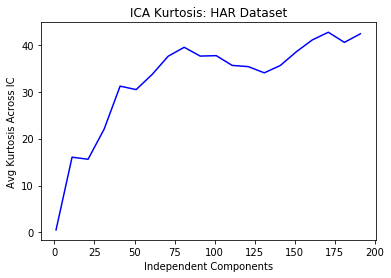

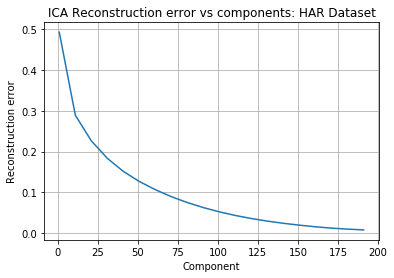

In [19]:
# Compute ICA
from sklearn.decomposition import FastICA
kurt = []
mse = []

print(X.shape[1])
dims = range(1,200,10)
for dim in dims:
    ica = FastICA(n_components=dim, random_state=random_seed, max_iter=1000)
    print(dim)
    tmp = ica.fit_transform(X)
    X_temp = tmp
    tmp = pd.DataFrame(tmp)
    tmp = tmp.kurt(axis=0)
    kurt.append(tmp.abs().mean())
    X_inverse = ica.inverse_transform(X_temp)
    mse.append(np.sum(np.square(X - X_inverse))/X_inverse.size)

n_best = dims[np.argmax(kurt)]
print('Optimal number of independent components: ', n_best)



plt.figure()
plt.title("ICA Kurtosis: HAR Dataset")
plt.xlabel("Independent Components")
plt.ylabel("Avg Kurtosis Across IC")
plt.plot(dims, kurt, 'b-')
plt.grid(False)
plt.show()

plt.figure()
plt.plot(dims, mse)
plt.xlabel('Component')
plt.ylabel('Reconstruction error')
plt.title('ICA Reconstruction error vs components: HAR Dataset')
plt.grid()

In [20]:


ica = FastICA(n_components=n_best, random_state=random_seed, max_iter=1000)

X_reduced_ica = ica.fit_transform(X)  # Get the estimated sources
A_ = ica.mixing_.T
X_inverse = ica.inverse_transform(X_reduced_ica)
mse1 = np.sum(np.square(X - X_inverse))/X_inverse.size
print('ICA Reconstruction mean squared error for HAR dataset: ', mse1)

ICA Reconstruction mean squared error for HAR dataset:  0.012447770030145184


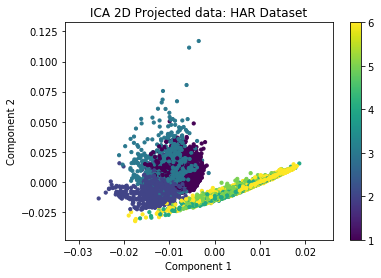

In [21]:
ica = FastICA(n_components=2, random_state = random_seed)
X_2d_ica = ica.fit_transform(X)  
plt.scatter(X_2d_ica[:,0], X_2d_ica[:,1],c=Y,s=10);
plt.colorbar()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('ICA 2D Projected data: HAR Dataset');

# Dimensionality Reduction: Randomized projections

In [22]:
from sklearn.random_projection import GaussianRandomProjection
rca = GaussianRandomProjection(n_components = n_best, random_state = random_seed)
X_reduced_rca = rca.fit_transform(X)

In [23]:
# from itertools import product
# from sklearn.metrics.pairwise import pairwise_distances
# from collections import defaultdict

# def pairwiseDistCorr(X1,X2):
#     assert X1.shape[0] == X2.shape[0]
    
#     d1 = pairwise_distances(X1)
#     d2 = pairwise_distances(X2)
#     return np.corrcoef(d1.ravel(),d2.ravel())[0,1]

# dims = list(range(1,200,20))
# # dims = list(np.arange(2,(X.shape[1]-1),3))
# # dims.append(X.shape[1])
# tmp = defaultdict(dict)

# for i,dim in product(range(5),dims):
#     print(i,dim)
#     rp = GaussianRandomProjection(random_state=random_seed, n_components=dim)
#     tmp[dim][i] = pairwiseDistCorr(rp.fit_transform(X), X)
# tmp = pd.DataFrame(tmp).T
# mean_recon = tmp.mean(axis=1).tolist()
# std_recon = tmp.std(axis=1).tolist()


# fig, ax1 = plt.subplots()
# ax1.plot(dims,mean_recon, 'b-')
# ax1.set_xlabel('Random Components')
# # Make the y-axis label, ticks and tick labels match the line color.
# ax1.set_ylabel('Mean Reconstruction Correlation', color='b')
# ax1.tick_params('y', colors='b')
# plt.grid(False)

# ax2 = ax1.twinx()
# ax2.plot(dims,std_recon, 'm-')
# ax2.set_ylabel('STD Reconstruction Correlation', color='m')
# ax2.tick_params('y', colors='m')
# plt.grid(False)

# plt.title("Random Components for 5 Restarts: HAR Dataset")
# fig.tight_layout()
# plt.show()

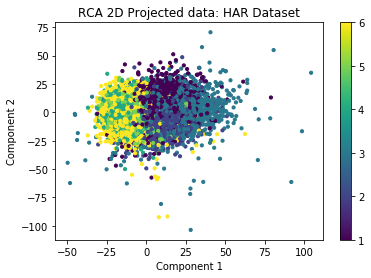

In [24]:
rca = GaussianRandomProjection(n_components=2, random_state = random_seed)
X_2d_rca = rca.fit_transform(X)  
plt.scatter(X_2d_rca[:,0], X_2d_rca[:,1],c=Y,s=10);
plt.colorbar()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('RCA 2D Projected data: HAR Dataset');



# Dimensionality Reduction: Tree based feature selection

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50,random_state=random_seed)
clf = clf.fit(X,Y)
tree_model = SelectFromModel(clf, prefit=True)
X_reduced_tree = tree_model.transform(X)
print(X_reduced_tree.shape)

(10299, 132)


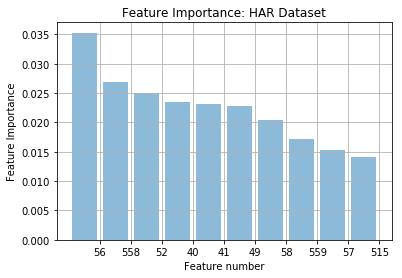

In [55]:
imp = clf.feature_importances_ 
imp = pd.DataFrame(imp,columns=['Feature Importance'])
imp.sort_values(by=['Feature Importance'],inplace=True,ascending=False)
imp['Cum Sum'] = imp['Feature Importance'].cumsum()
imp = imp[imp['Cum Sum']<=0.95]
top_cols = imp.index.tolist()

plt.figure()
plt.bar( np.arange(0, 10) - 0.5,imp['Feature Importance'][:10].tolist(),alpha=0.5)
plt.xticks(np.arange(0,10),top_cols[:10])
plt.xlabel('Feature number')
plt.ylabel('Feature Importance')
plt.title('Feature Importance: HAR Dataset')
plt.grid()


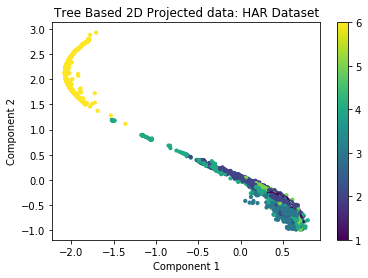

In [56]:
tree_based = SelectFromModel(clf, max_features = 2, threshold=-np.inf, prefit=True)
X_2d_tree = tree_based.transform(X)  
plt.scatter(X_2d_tree[:,0], X_2d_tree[:,1],c=Y,s=10);
plt.colorbar()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Tree Based 2D Projected data: HAR Dataset');

# PCA with K-means

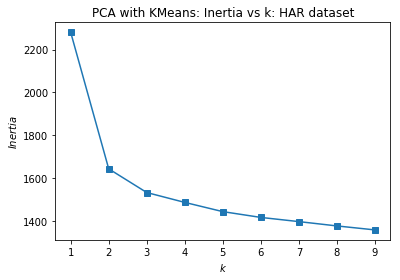

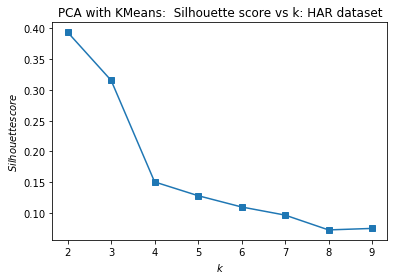

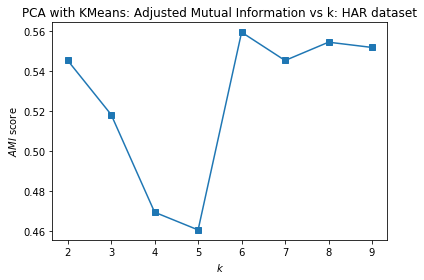

In [58]:
inertia = []
sil = []
ami = []
max_k = 10
for k in range(1, max_k):
    print("k:",k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed, n_jobs = -1).fit(X_reduced_pca)
    inertia.append(np.sqrt(kmeans.inertia_))
    if(k > 1):
        sil.append(silhouette_score(X, kmeans.labels_))
        ami.append(adjusted_mutual_info_score(Y, kmeans.labels_, average_method = 'arithmetic'))
plt.plot(range(1, max_k), inertia, marker='s');
plt.title('PCA with KMeans: Inertia vs k: HAR dataset')
plt.xlabel('$k$')
plt.ylabel('$Inertia$');
plt.show()

plt.plot(range(2, max_k), sil, marker='s');
plt.title('PCA with KMeans:  Silhouette score vs k: HAR dataset')
plt.xlabel('$k$')
plt.ylabel('$Silhouette score$');
plt.show()

plt.plot(range(2, max_k), ami, marker='s');
plt.title('PCA with KMeans: Adjusted Mutual Information vs k: HAR dataset')
plt.xlabel('$k$')
plt.ylabel('$AMI$ score');
plt.show()

(10299,)


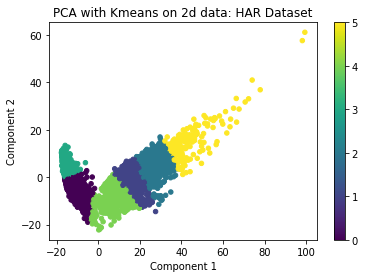

In [30]:
k = 6
kmeans = KMeans(n_clusters=k,n_init=100,random_state=random_seed).fit(X_2d_pca)
X_clustered = kmeans.predict(X_2d_pca)
print(X_clustered.shape)
plt.scatter(X_2d_pca[:,0], X_2d_pca[:,1], c=X_clustered,s=20);
plt.colorbar()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA with Kmeans on 2d data: HAR Dataset');

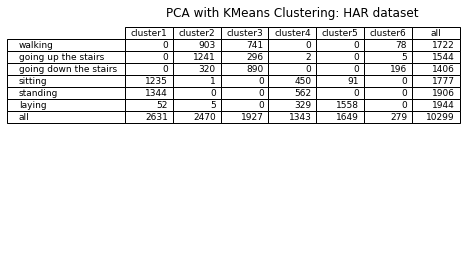

In [31]:
k = 6
kmeans = KMeans(n_clusters=k,n_init=100,random_state=random_seed).fit(X_reduced_pca)
X_clustered = kmeans.predict(X_reduced_pca)
tab = pd.crosstab(Y, X_clustered, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(k)] + ['all']
plt.figure()
ax = plt.subplot(111,frameon=False,title = "PCA with KMeans Clustering: HAR dataset") # no visible frame
ax.axis("off")
table(ax, tab, loc = 'upper center');

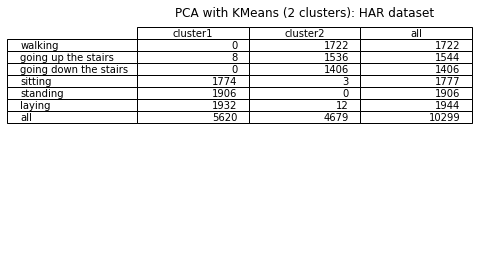

In [33]:
k = 2
kmeans = KMeans(n_clusters=k,n_init=100,random_state=random_seed).fit(X_reduced_pca)
X_clustered = kmeans.predict(X_reduced_pca)
tab = pd.crosstab(Y, X_clustered, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(k)] + ['all']
plt.figure()
ax = plt.subplot(111,frameon=False, title = "PCA with KMeans (2 clusters): HAR dataset") # no visible frame
ax.axis("off")
table(ax, tab, loc = 'upper center');

# ICA with K-means

k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9


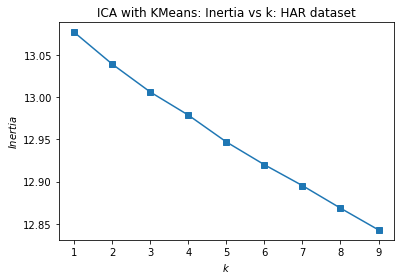

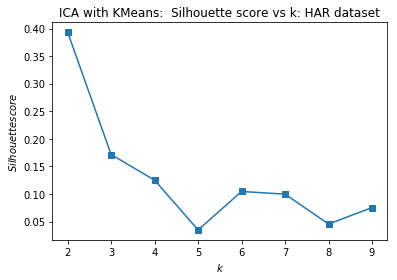

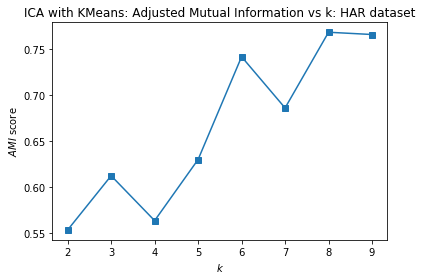

In [59]:
inertia = []
sil = []
ami = []
max_k = 10
for k in range(1, max_k):
    print("k:",k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed, n_jobs = -1).fit(X_reduced_ica)
    inertia.append(np.sqrt(kmeans.inertia_))
    if(k > 1):
        sil.append(silhouette_score(X, kmeans.labels_))
        ami.append(adjusted_mutual_info_score(Y, kmeans.labels_, average_method = 'arithmetic'))
plt.plot(range(1, max_k), inertia, marker='s');
plt.title('ICA with KMeans: Inertia vs k: HAR dataset')
plt.xlabel('$k$')
plt.ylabel('$Inertia$');
plt.show()

plt.plot(range(2, max_k), sil, marker='s');
plt.title('ICA with KMeans:  Silhouette score vs k: HAR dataset')
plt.xlabel('$k$')
plt.ylabel('$Silhouette score$');
plt.show()

plt.plot(range(2, max_k), ami, marker='s');
plt.title('ICA with KMeans: Adjusted Mutual Information vs k: HAR dataset')
plt.xlabel('$k$')
plt.ylabel('$AMI$ score');
plt.show()

(10299,)


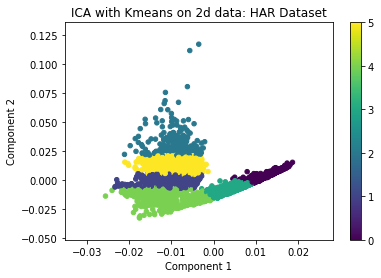

In [35]:
k = 6
kmeans = KMeans(n_clusters=k,n_init=100,random_state=random_seed).fit(X_2d_ica)
X_clustered = kmeans.predict(X_2d_ica)
print(X_clustered.shape)
plt.scatter(X_2d_ica[:,0], X_2d_ica[:,1], c=X_clustered,s=20);
plt.colorbar()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('ICA with Kmeans on 2d data: HAR Dataset');

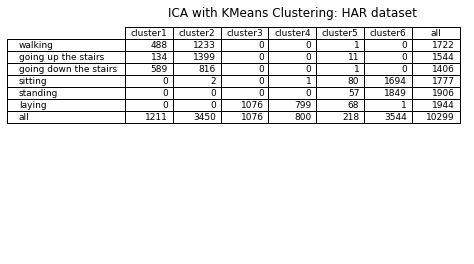

In [36]:
k = 6
kmeans = KMeans(n_clusters=k,n_init=100,random_state=random_seed).fit(X_reduced_ica)
X_clustered = kmeans.predict(X_reduced_ica)
tab = pd.crosstab(Y, X_clustered, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(k)] + ['all']
plt.figure()
ax = plt.subplot(111,frameon=False, title = "ICA with KMeans Clustering: HAR dataset") # no visible frame
ax.axis("off")
table(ax, tab, loc = 'upper center');

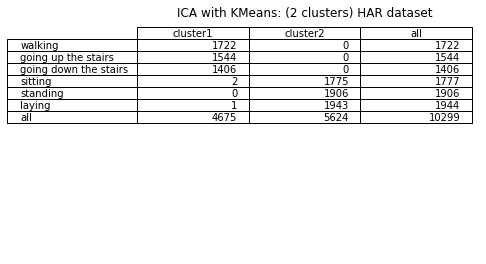

In [37]:
k = 2
kmeans = KMeans(n_clusters=k,n_init=100,random_state=random_seed).fit(X_reduced_ica)
X_clustered = kmeans.predict(X_reduced_ica)
tab = pd.crosstab(Y, X_clustered, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(k)] + ['all']
plt.figure()
ax = plt.subplot(111,frameon=False, title = "ICA with KMeans: (2 clusters) HAR dataset") # no visible frame
ax.axis("off")
table(ax, tab, loc = 'upper center');

# RCA with K-means

k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9


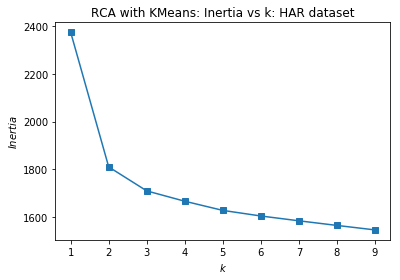

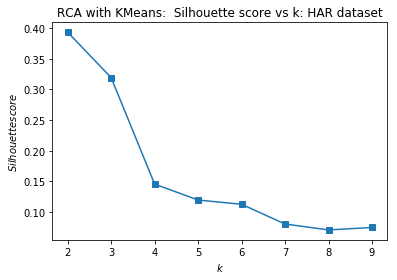

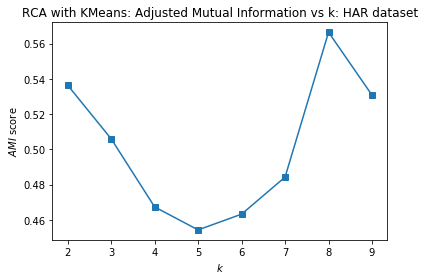

In [60]:
inertia = []
sil = []
ami = []
max_k = 10
for k in range(1, max_k):
    print("k:",k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed, n_jobs = -1).fit(X_reduced_rca)
    inertia.append(np.sqrt(kmeans.inertia_))
    if(k > 1):
        sil.append(silhouette_score(X, kmeans.labels_))
        ami.append(adjusted_mutual_info_score(Y, kmeans.labels_, average_method = 'arithmetic'))
plt.plot(range(1, max_k), inertia, marker='s');
plt.title('RCA with KMeans: Inertia vs k: HAR dataset')
plt.xlabel('$k$')
plt.ylabel('$Inertia$');
plt.show()

plt.plot(range(2, max_k), sil, marker='s');
plt.title('RCA with KMeans:  Silhouette score vs k: HAR dataset')
plt.xlabel('$k$')
plt.ylabel('$Silhouette score$');
plt.show()

plt.plot(range(2, max_k), ami, marker='s');
plt.title('RCA with KMeans: Adjusted Mutual Information vs k: HAR dataset')
plt.xlabel('$k$')
plt.ylabel('$AMI$ score');
plt.show()

(10299,)


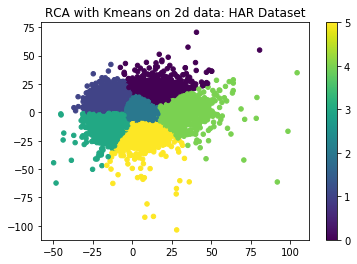

In [38]:
k = 6
kmeans = KMeans(n_clusters=k,n_init=100,random_state=random_seed).fit(X_2d_rca)
X_clustered = kmeans.predict(X_2d_rca)
print(X_clustered.shape)
plt.scatter(X_2d_rca[:,0], X_2d_rca[:,1], c=X_clustered,s=20);
plt.colorbar()
plt.title('RCA with Kmeans on 2d data: HAR Dataset');

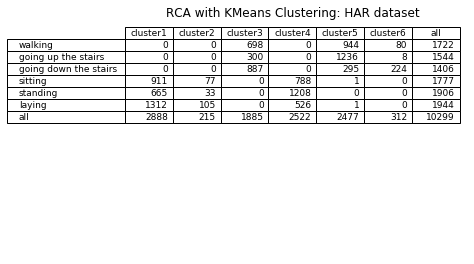

In [39]:
k = 6
kmeans = KMeans(n_clusters=k,n_init=100,random_state=random_seed).fit(X_reduced_rca)
X_clustered = kmeans.predict(X_reduced_rca)
tab = pd.crosstab(Y, X_clustered, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(k)] + ['all']
plt.figure()
ax = plt.subplot(111,frameon=False, title = "RCA with KMeans Clustering: HAR dataset") # no visible frame
ax.axis("off")
table(ax, tab, loc = 'upper center');

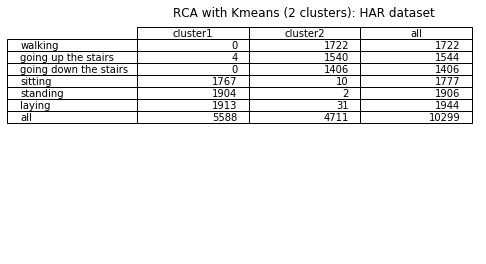

In [40]:
k = 2
kmeans = KMeans(n_clusters=k,n_init=100,random_state = random_seed).fit(X_reduced_rca)
X_clustered = kmeans.predict(X_reduced_rca)
tab = pd.crosstab(Y, X_clustered, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(k)] + ['all']
plt.figure()
ax = plt.subplot(111,frameon=False, title = "RCA with Kmeans (2 clusters): HAR dataset") # no visible frame
ax.axis("off")
table(ax, tab, loc = 'upper center');

# Tree-based feature selection with K-means

k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9


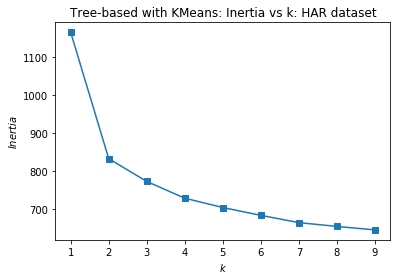

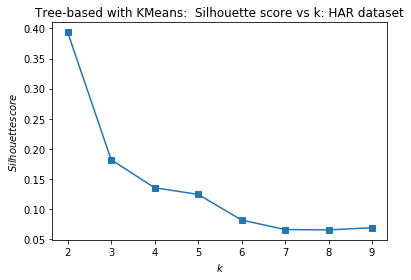

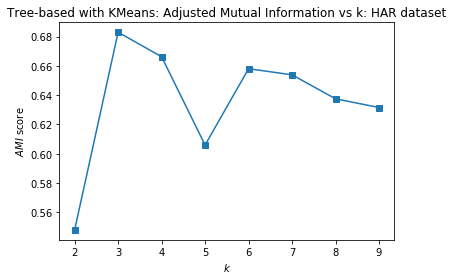

In [61]:
inertia = []
sil = []
ami = []
max_k = 10
for k in range(1, max_k):
    print("k:",k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed, n_jobs = -1).fit(X_reduced_tree)
    inertia.append(np.sqrt(kmeans.inertia_))
    if(k > 1):
        sil.append(silhouette_score(X, kmeans.labels_))
        ami.append(adjusted_mutual_info_score(Y, kmeans.labels_, average_method = 'arithmetic'))
plt.plot(range(1, max_k), inertia, marker='s');
plt.title('Tree-based with KMeans: Inertia vs k: HAR dataset')
plt.xlabel('$k$')
plt.ylabel('$Inertia$');
plt.show()

plt.plot(range(2, max_k), sil, marker='s');
plt.title('Tree-based with KMeans:  Silhouette score vs k: HAR dataset')
plt.xlabel('$k$')
plt.ylabel('$Silhouette score$');
plt.show()

plt.plot(range(2, max_k), ami, marker='s');
plt.title('Tree-based with KMeans: Adjusted Mutual Information vs k: HAR dataset')
plt.xlabel('$k$')
plt.ylabel('$AMI$ score');
plt.show()

(10299,)


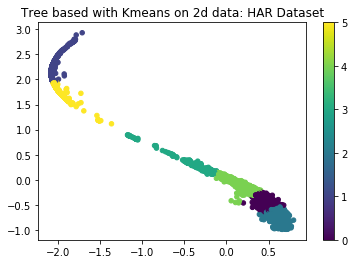

In [62]:
k = 6
kmeans = KMeans(n_clusters=k,n_init=100,random_state=1).fit(X_2d_tree)
X_clustered = kmeans.predict(X_2d_tree)
print(X_clustered.shape)
plt.scatter(X_2d_tree[:,0], X_2d_tree[:,1], c=X_clustered,s=20);
plt.colorbar()
plt.title('Tree based with Kmeans on 2d data: HAR Dataset');

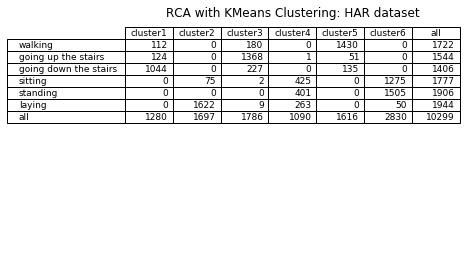

In [74]:
k = 6
kmeans = KMeans(n_clusters=k,n_init=100,random_state=1).fit(X_reduced_tree)
X_clustered = kmeans.predict(X_reduced_tree)
tab = pd.crosstab(Y, X_clustered, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(k)] + ['all']
plt.figure()
ax = plt.subplot(111,frameon=False, title = "RCA with KMeans Clustering: HAR dataset") # no visible frame
ax.axis("off")
table(ax, tab, loc = 'upper center');

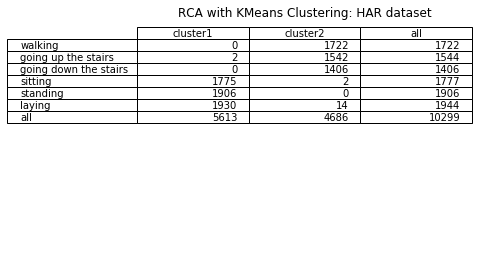

In [75]:
k = 2
kmeans = KMeans(n_clusters=k,n_init=100,random_state=1).fit(X_reduced_tree)
X_clustered = kmeans.predict(X_reduced_tree)
tab = pd.crosstab(Y, X_clustered, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(k)] + ['all']
plt.figure()
ax = plt.subplot(111,frameon=False, title = "RCA with KMeans Clustering: HAR dataset") # no visible frame
ax.axis("off")
table(ax, tab, loc = 'upper center');

In [ ]:

# components = 6
# gmm = GMM(n_components=components,covariance_type='full',random_state=1).fit(X_reduced)
# X_clustered = gmm.predict(X_reduced)

# plt.scatter(X_reduced[:,0], X_reduced[:,1], c=X_clustered,s=20);
# plt.colorbar()



In [ ]:
# tab = pd.crosstab(Y, X_clustered, margins=True)
# tab.index = ['walking', 'going up the stairs',
#             'going down the stairs', 'sitting', 'standing', 'laying', 'all']
# tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['all']
# tab

In [ ]:

# components = 2
# gmm = GMM(n_components=components,covariance_type='full',random_state=1).fit(X_reduced)
# X_clustered = gmm.predict(X_reduced)

# plt.scatter(X_reduced[:,0], X_reduced[:,1], c=X_clustered,s=20);
# plt.colorbar()



# PCA with Expectation Maximization

Components: 1
Components: 2
Components: 3
Components: 4
Components: 5
Components: 6
Components: 7
Components: 8
Components: 9


Text(0.5, 1.0, 'AIC/BIC vs GMM components: HAR Dataset')

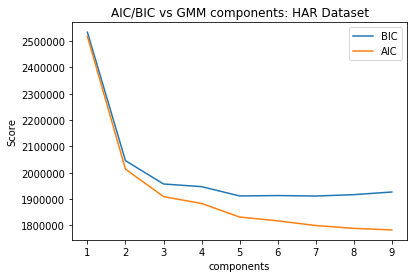

In [69]:
aic = []
bic = []
max_components = 10
for components in range(1, max_components):
    print("Components:",components)
    gmm = GMM(n_components=components,covariance_type='full',random_state=random_seed).fit(X_reduced_pca)
    aic.append(gmm.aic(X_reduced_pca))
    bic.append(gmm.bic(X_reduced_pca))

plt.plot(np.arange(1,max_components), bic, label='BIC')
plt.plot(np.arange(1,max_components), aic, label='AIC')
plt.legend(loc='best')
plt.xlabel('components');
plt.ylabel('Score')
plt.title('AIC/BIC vs GMM components: HAR Dataset')

(10299,)


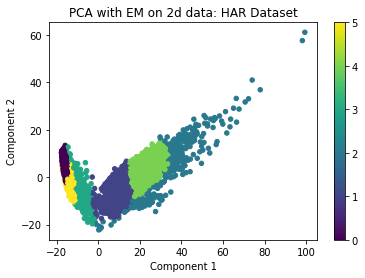

In [43]:
components = 6
gmm = GMM(n_components=components,covariance_type='full',random_state=random_seed).fit(X_2d_pca)
X_clustered = gmm.predict(X_2d_pca)
print(X_clustered.shape)
plt.scatter(X_2d_pca[:,0], X_2d_pca[:,1], c=X_clustered,s=20);
plt.colorbar()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA with EM on 2d data: HAR Dataset');

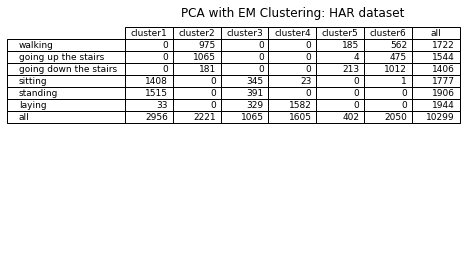

In [44]:
components = 6
gmm = GMM(n_components=components,covariance_type='full',random_state=random_seed).fit(X_reduced_pca)
X_clustered = gmm.predict(X_reduced_pca)
tab = pd.crosstab(Y, X_clustered, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(components)] + ['all']
plt.figure()
ax = plt.subplot(111,frameon=False, title = "PCA with EM Clustering: HAR dataset") # no visible frame
ax.axis("off")
table(ax, tab, loc = 'upper center');

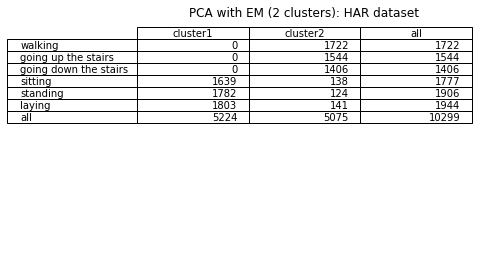

In [45]:
components = 2
gmm = GMM(n_components=components,covariance_type='full',random_state=random_seed).fit(X_reduced_pca)
X_clustered = gmm.predict(X_reduced_pca)
tab = pd.crosstab(Y, X_clustered, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(components)] + ['all']
plt.figure()
ax = plt.subplot(111,frameon=False, title = "PCA with EM (2 clusters): HAR dataset") # no visible frame
ax.axis("off")
table(ax, tab, loc = 'upper center');

# ICA with Expectation Maximization

Components: 1
Components: 2
Components: 3
Components: 4
Components: 5
Components: 6
Components: 7
Components: 8
Components: 9


Text(0.5, 1.0, 'AIC/BIC vs GMM components: HAR Dataset')

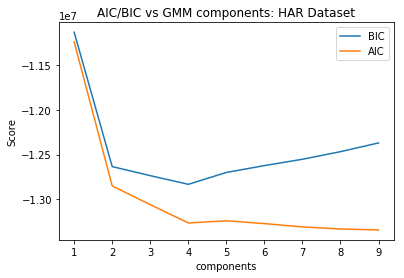

In [70]:
aic = []
bic = []
max_components = 10
for components in range(1, max_components):
    print("Components:",components)
    gmm = GMM(n_components=components,covariance_type='full',random_state=random_seed).fit(X_reduced_ica)
    aic.append(gmm.aic(X_reduced_ica))
    bic.append(gmm.bic(X_reduced_ica))

plt.plot(np.arange(1,max_components), bic, label='BIC')
plt.plot(np.arange(1,max_components), aic, label='AIC')
plt.legend(loc='best')
plt.xlabel('components');
plt.ylabel('Score')
plt.title('AIC/BIC vs GMM components: HAR Dataset')

(10299,)


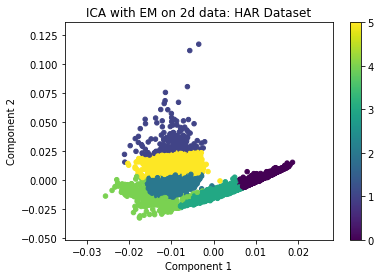

In [46]:
components = 6
gmm = GMM(n_components=components,covariance_type='full',random_state=random_seed).fit(X_2d_ica)
X_clustered = gmm.predict(X_2d_ica)
print(X_clustered.shape)
plt.scatter(X_2d_ica[:,0], X_2d_ica[:,1], c=X_clustered,s=20);
plt.colorbar()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('ICA with EM on 2d data: HAR Dataset');

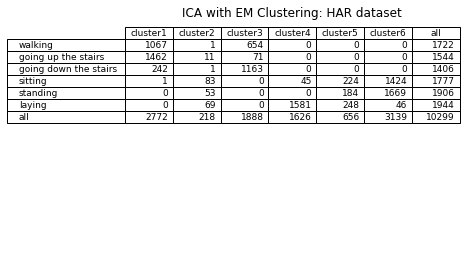

In [47]:
components = 6
gmm = GMM(n_components=components,covariance_type='full',random_state=random_seed).fit(X_reduced_ica)
X_clustered = gmm.predict(X_reduced_ica)
tab = pd.crosstab(Y, X_clustered, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(components)] + ['all']
plt.figure()
ax = plt.subplot(111,frameon=False, title = "ICA with EM Clustering: HAR dataset") # no visible frame
ax.axis("off")
table(ax, tab, loc = 'upper center');

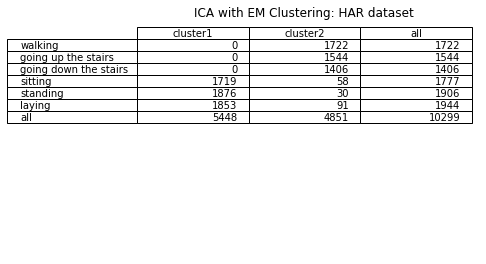

In [48]:
components = 2
gmm = GMM(n_components=components,covariance_type='full',random_state=random_seed).fit(X_reduced_ica)
X_clustered = gmm.predict(X_reduced_ica)
tab = pd.crosstab(Y, X_clustered, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(components)] + ['all']
plt.figure()
ax = plt.subplot(111,frameon=False,  title = "ICA with EM Clustering: HAR dataset") # no visible frame
ax.axis("off")
table(ax, tab, loc = 'upper center');

# RCA with Expectation Maximization

Components: 1
Components: 2
Components: 3
Components: 4
Components: 5
Components: 6
Components: 7
Components: 8
Components: 9


Text(0.5, 1.0, 'AIC/BIC vs GMM components: HAR Dataset')

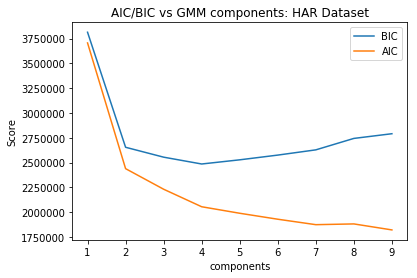

In [71]:
aic = []
bic = []
max_components = 10
for components in range(1, max_components):
    print("Components:",components)
    gmm = GMM(n_components=components,covariance_type='full',random_state=random_seed).fit(X_reduced_rca)
    aic.append(gmm.aic(X_reduced_rca))
    bic.append(gmm.bic(X_reduced_rca))

plt.plot(np.arange(1,max_components), bic, label='BIC')
plt.plot(np.arange(1,max_components), aic, label='AIC')
plt.legend(loc='best')
plt.xlabel('components');
plt.ylabel('Score')
plt.title('AIC/BIC vs GMM components: HAR Dataset')

(10299,)


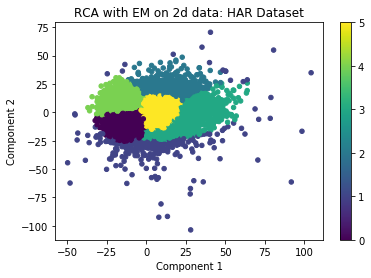

In [49]:
components = 6
gmm = GMM(n_components=components,covariance_type='full',random_state=random_seed).fit(X_2d_rca)
X_clustered = gmm.predict(X_2d_rca)
print(X_clustered.shape)
plt.scatter(X_2d_rca[:,0], X_2d_rca[:,1], c=X_clustered,s=20);
plt.colorbar()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('RCA with EM on 2d data: HAR Dataset');

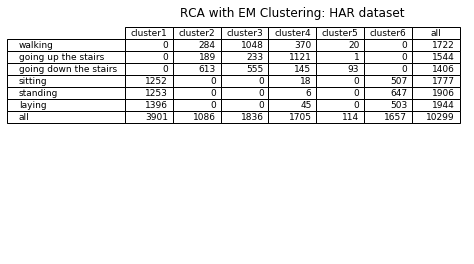

In [50]:
components = 6
gmm = GMM(n_components=components,covariance_type='full',random_state=random_seed).fit(X_reduced_rca)
X_clustered = gmm.predict(X_reduced_rca)
tab = pd.crosstab(Y, X_clustered, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(components)] + ['all']
plt.figure()
ax = plt.subplot(111,frameon=False, title = "RCA with EM Clustering: HAR dataset") # no visible frame
ax.axis("off")
table(ax, tab, loc = 'upper center')

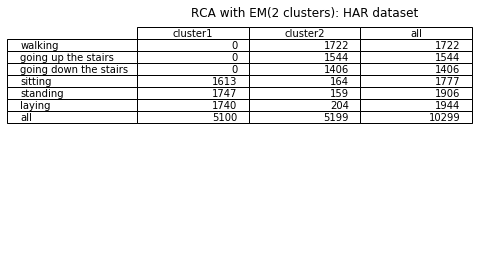

In [51]:
components = 2
gmm = GMM(n_components=components,covariance_type='full',random_state=random_seed).fit(X_reduced_rca)
X_clustered = gmm.predict(X_reduced_rca)
tab = pd.crosstab(Y, X_clustered, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(components)] + ['all']
plt.figure()
ax = plt.subplot(111,frameon=False, title = "RCA with EM(2 clusters): HAR dataset") # no visible frame
ax.axis("off")
table(ax, tab, loc = 'upper center')

# Tree based feature selection with Expectation Maximization

Components: 1
Components: 2
Components: 3
Components: 4
Components: 5
Components: 6
Components: 7
Components: 8
Components: 9


Text(0.5, 1.0, 'AIC/BIC vs GMM components: HAR Dataset')

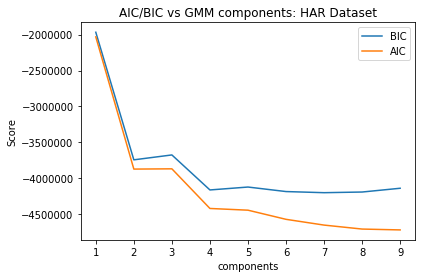

In [72]:
aic = []
bic = []
max_components = 10
for components in range(1, max_components):
    print("Components:",components)
    gmm = GMM(n_components=components,covariance_type='full',random_state=random_seed).fit(X_reduced_tree)
    aic.append(gmm.aic(X_reduced_tree))
    bic.append(gmm.bic(X_reduced_tree))

plt.plot(np.arange(1,max_components), bic, label='BIC')
plt.plot(np.arange(1,max_components), aic, label='AIC')
plt.legend(loc='best')
plt.xlabel('components');
plt.ylabel('Score')
plt.title('AIC/BIC vs GMM components: HAR Dataset')

(10299,)


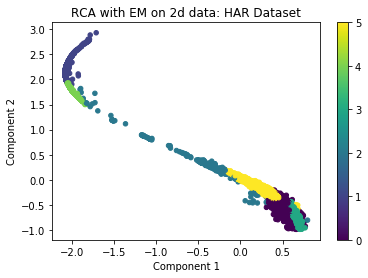

In [68]:
components = 6
gmm = GMM(n_components=components,covariance_type='full',random_state=random_seed).fit(X_2d_tree)
X_clustered = gmm.predict(X_2d_tree)
print(X_clustered.shape)
plt.scatter(X_2d_tree[:,0], X_2d_tree[:,1], c=X_clustered,s=20);
plt.colorbar()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('RCA with EM on 2d data: HAR Dataset');

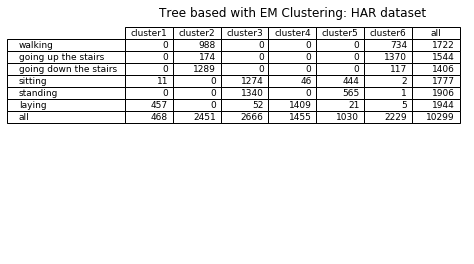

In [65]:
components = 6
gmm = GMM(n_components=components,covariance_type='full',random_state=random_seed).fit(X_reduced_tree)
X_clustered = gmm.predict(X_reduced_tree)
tab = pd.crosstab(Y, X_clustered, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(components)] + ['all']
plt.figure()
ax = plt.subplot(111,frameon=False, title = "Tree based with EM Clustering: HAR dataset") # no visible frame
ax.axis("off")
table(ax, tab, loc = 'upper center')

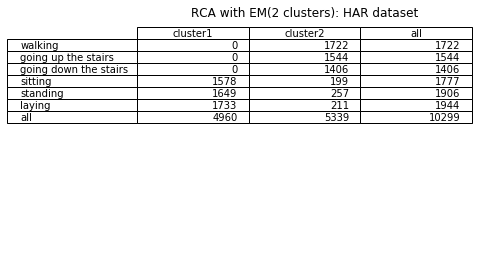

In [66]:
components = 2
gmm = GMM(n_components=components,covariance_type='full',random_state=random_seed).fit(X_reduced_tree)
X_clustered = gmm.predict(X_reduced_tree)
tab = pd.crosstab(Y, X_clustered, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(components)] + ['all']
plt.figure()
ax = plt.subplot(111,frameon=False, title = "RCA with EM(2 clusters): HAR dataset") # no visible frame
ax.axis("off")
table(ax, tab, loc = 'upper center')